# quantum UCC ansatz tutorial

In [1]:
# library for creating custom quantum UCC ansatze
import quantum_UCC_ansatz as qucca

# library for creating pyscf objects in qiskit
from qiskit_nature.second_q.drivers import PySCFDriver

# pyscf functions used for fci reference
from pyscf import gto
from pyscf import dft
from pyscf import scf
from pyscf.fci import FCI

from datetime import datetime

## Creating ansatze

Creating a molecule

In [2]:
driver = PySCFDriver(atom="H 0 0 0; H 0 0 1", spin=0, basis="sto-3g")
mol = driver.run()

Creating a custom ansatz, a HF reference state is added automatically

/usr/local/miniconda3/lib/python3.7/site-packages/qiskit_nature/deprecation.py:297: PauliSumOpDeprecationWarning: PauliSumOp is deprecated as of version 0.6.0 and support for them will be removed no sooner than 3 months after the release. Instead, use SparsePauliOp. You can switch to SparsePauliOp immediately, by setting `qiskit_nature.settings.use_pauli_sum_op` to `False`.
  return func(*args, **kwargs)


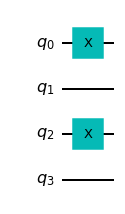

In [3]:
ansatz = qucca.CustomAnsatz(mol)
ansatz.circuit.draw(output="mpl")

excitations can be generated and added automatically, or when creating an ansatz

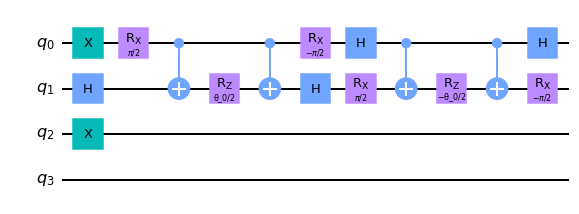

In [4]:
ansatz.add_excitation( from_ind=[0], to_ind=[1])
ansatz.circuit.draw(output="mpl")

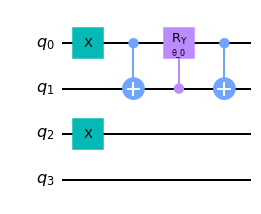

In [5]:
ansatz = qucca.CustomAnsatz(mol)
ansatz.add_compressed_single( from_ind=[0], to_ind=[1])
ansatz.circuit.draw(output="mpl")

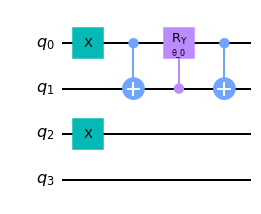

In [6]:
ansatz = qucca.CustomAnsatz(mol)
ansatz.add_compressed_single( from_ind=[0,2], to_ind=[1,3])
ansatz.circuit.draw(output="mpl")

In [7]:
ansatz.generate_CCS_excitations()

[[[0], [1]], [[0], [3]], [[2], [1]], [[2], [3]]]

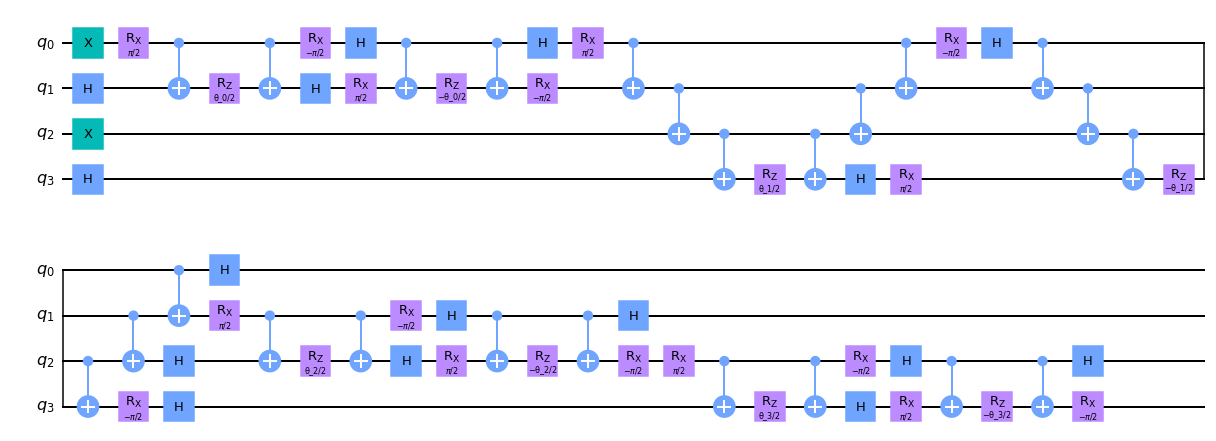

In [4]:
ansatz = qucca.CustomAnsatz(mol, singles=True)
ansatz.circuit.draw(output="mpl")

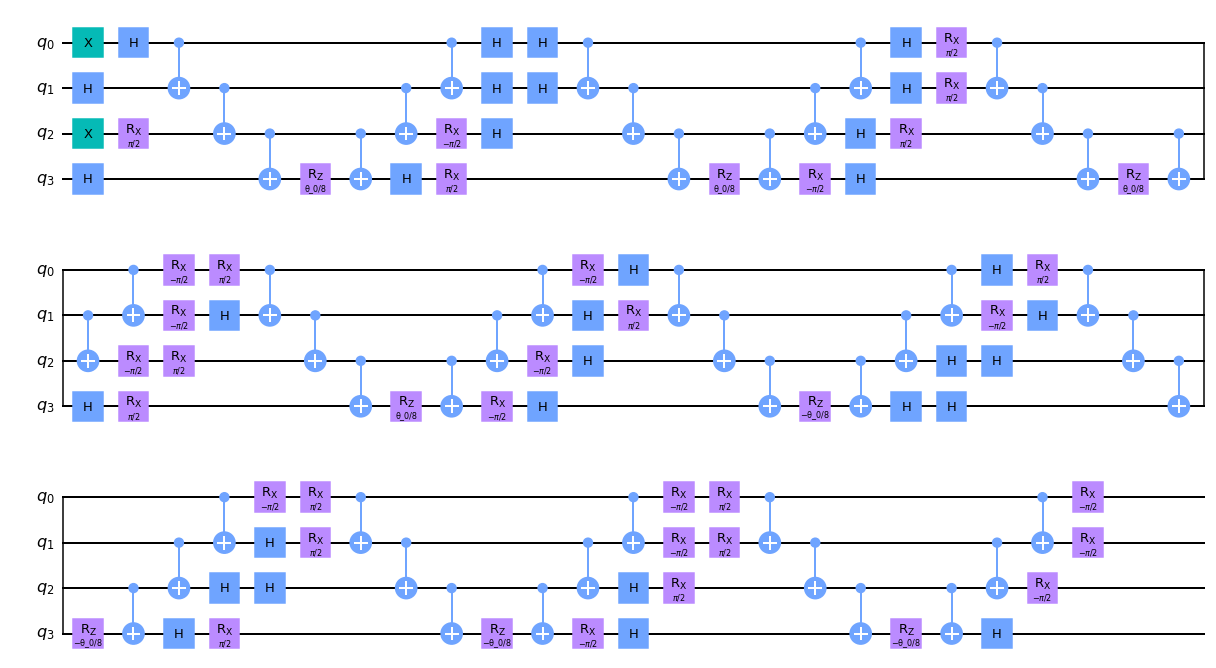

In [9]:
ansatz = qucca.CustomAnsatz(mol, pair_doubles=True)
ansatz.circuit.draw(output="mpl")

In [8]:
qucca.CustomAnsatz(mol, singles=True, doubles=True) # all doubles and singles

To create a k-UpCC ansatz the k parameter can be specified

In [9]:
qucca.CustomAnsatz(mol, singles=True, pair_doubles=True, k=2)

Creating a UpCCS ansatz using compressed excitation operator representations

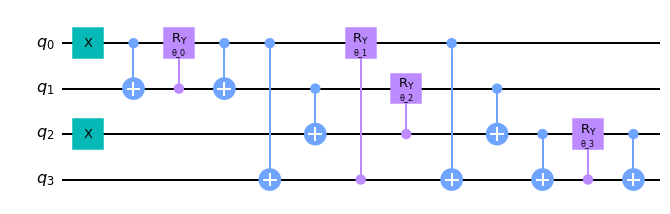

In [12]:
ansatz = qucca.CustomAnsatz(mol)

for exc in ansatz.generate_CCS_excitations():
    ansatz.add_compressed_single(exc[0], exc[1])

ansatz.circuit.draw(output="mpl")

Optimizing the ansatz rotation variables using a VQE (Variational Quantum Eigensolver) and retrieving the energy of the molecule

In [10]:
qucca.solve(mol, ansatz.circuit)

-1.0661086493179361

## H2

In [11]:
mol = gto.Mole()
mol.atom = f"H 0 0 0; H 0 0 2"
mol.basis = 'sto-3g'
mol.spin=0
mol.build()

# fci
print("fci")
mf = mol.RHF().run()
cisolver = FCI(mf)
fci_res = cisolver.kernel()[0]



driver = PySCFDriver(atom="H 0 0 0; H 0 0 2", spin=0, basis="sto-3g")
mol = driver.run()


# UCCS
start = datetime.now()
UCCS_ansatz = qucca.CustomAnsatz(mol, singles=True)
res = qucca.solve(mol, UCCS_ansatz.circuit)
print("UCCS:        ", round(res, 6), "| FCI diff: ", round(res - fci_res, 6), "| time: ", datetime.now() - start)

# # compressed UCCS
# start = datetime.now()
# comp_UCCS_ansatz = ansatz = qucca.CustomAnsatz(mol)
# for exc in comp_UCCS_ansatz.generate_CCS_excitations():
#     comp_UCCS_ansatz.add_compressed_single(exc[0], exc[1])
# res = qucca.solve(mol, comp_UCCS_ansatz.circuit)
# print("comp_UCCS:   ", round(res, 6), "| FCI diff: ", round(res - fci_res, 6), "| time: ", datetime.now() - start)

# UpCCD
start = datetime.now()
UpCCD_ansatz = qucca.CustomAnsatz(mol, pair_doubles=True)
res = qucca.solve(mol, UpCCD_ansatz.circuit)
print("UpCCD:       ", round(res, 6), "| FCI diff: ", round(res - fci_res, 6), "| time: ", datetime.now() - start)

# # compressed UpCCD
# start = datetime.now()
# comp_UpCCD_ansatz = ansatz = qucca.CustomAnsatz(mol)
# for exc in comp_UpCCD_ansatz.generate_pCCD_excitations():
#     comp_UpCCD_ansatz.add_compressed_double(exc[0], exc[1])
# res = qucca.solve(mol, comp_UpCCD_ansatz.circuit)
# print("comp_UpCCD:  ", round(res, 6), "| FCI diff: ", round(res - fci_res, 6), "| time: ", datetime.now() - start)

# UpCCSD
start = datetime.now()
UpCCSD_ansatz = qucca.CustomAnsatz(mol, singles=True, pair_doubles=True)
res = qucca.solve(mol, UpCCSD_ansatz.circuit)
print("UpCCSD:      ", round(res, 6), "| FCI diff: ", round(res - fci_res, 6), "| time: ", datetime.now() - start)

# UCCSD
start = datetime.now()
UCCSD_ansatz = qucca.CustomAnsatz(mol, singles=True, doubles=True)
res = qucca.solve(mol, UCCSD_ansatz.circuit)
print("UCCSD:      ", round(res, 6), "| FCI diff: ", round(res - fci_res, 6), "| time: ", datetime.now() - start)

# # compressed UpCCSD
# start = datetime.now()
# comp_UpCCSD_ansatz = ansatz = qucca.CustomAnsatz(mol)
# for exc in comp_UpCCSD_ansatz.generate_CCS_excitations():
#     comp_UpCCSD_ansatz.add_compressed_single(exc[0], exc[1])
# for exc in comp_UpCCSD_ansatz.generate_pCCD_excitations():
#     comp_UpCCSD_ansatz.add_compressed_double(exc[0], exc[1])
# res = qucca.solve(mol, comp_UpCCSD_ansatz.circuit)
# print("comp_UpCCSD: ", round(res, 6), "| FCI diff: ", round(res - fci_res, 6), "| time: ", datetime.now() - start)

print("FCI: ", round(fci_res, 6))

fci
converged SCF energy = -0.783792654277353
UCCS:         -0.783793 | FCI diff:  0.164848 | time:  0:00:00.259479
UpCCD:        -0.948641 | FCI diff:  0.0 | time:  0:00:00.490465
UpCCSD:       -0.948641 | FCI diff:  0.0 | time:  0:00:01.399645
UCCSD:       -0.948641 | FCI diff:  0.0 | time:  0:00:01.373231
FCI:  -0.948641


# LiH

In [12]:
r = 2.5

structure = f"Li 0 0 0; H 0 0 {r}"
spin = 0

mol = gto.Mole()
mol.atom = structure
mol.basis = 'sto-3g'
mol.spin=spin
mol.build()

# fci
print("fci")
mf = mol.RHF().run()
cisolver = FCI(mf)
fci_res = cisolver.kernel()[0]

# hf
mf = scf.RHF(mol)
hf_res = mf.kernel()



driver = PySCFDriver(atom=structure, spin=spin, basis="sto-3g")
mol = driver.run()


# UCCS
start = datetime.now()
UCCS_ansatz = qucca.CustomAnsatz(mol, singles=True)
res = qucca.solve(mol, UCCS_ansatz.circuit)
print("UCCS:        ", round(res, 6), "| FCI diff: ", round(res - fci_res, 6)
      , " ", round((fci_res-res)*100/fci_res, 6), "%", "| time: ", datetime.now() - start)

# # compressed UCCS
# start = datetime.now()
# comp_UCCS_ansatz = qucca.CustomAnsatz(mol)
# for exc in comp_UCCS_ansatz.generate_CCS_excitations():
#     comp_UCCS_ansatz.add_compressed_single(exc[0], exc[1])
# res = qucca.solve(mol, comp_UCCS_ansatz.circuit)
# print("comp_UCCS:   ", round(res, 6), "| FCI diff: ", round(res - fci_res, 6), "| time: ", datetime.now() - start)

# UpCCD
start = datetime.now()
UpCCD_ansatz = qucca.CustomAnsatz(mol, pair_doubles=True)
res = qucca.solve(mol, UpCCD_ansatz.circuit)
print("UpCCD:       ", round(res, 6), "| FCI diff: ", round(res - fci_res, 6)
      , " ", round((fci_res-res)*100/fci_res, 6), "%", "| time: ", datetime.now() - start)

# # compressed UpCCD
# start = datetime.now()
# comp_UpCCD_ansatz = qucca.CustomAnsatz(mol)
# for exc in comp_UpCCD_ansatz.generate_pCCD_excitations():
#     comp_UpCCD_ansatz.add_compressed_double(exc[0], exc[1])
# res = qucca.solve(mol, comp_UpCCD_ansatz.circuit)
# print("comp_UpCCD:  ", round(res, 6), "| FCI diff: ", round(res - fci_res, 6), "| time: ", datetime.now() - start)

# UpCCSD
start = datetime.now()
UpCCSD_ansatz = qucca.CustomAnsatz(mol, singles=True, pair_doubles=True)
res = qucca.solve(mol, UpCCSD_ansatz.circuit)
print("UpCCSD:      ", round(res, 6), "| FCI diff: ", round(res - fci_res, 6)
      , " ", round((fci_res-res)*100/fci_res, 6), "%", "| time: ", datetime.now() - start)

# # 2-UpCCSD
# start = datetime.now()
# two_UpCCSD_ansatz = qucca.CustomAnsatz(mol, singles=True, pair_doubles=True, k=2)
# res = qucca.solve(mol, two_UpCCSD_ansatz.circuit)
# print("2-UpCCSD:      ", round(res, 6), "| FCI diff: ", round(res - fci_res, 6)
#       , " ", round((fci_res-res)*100/fci_res, 6), "%", "| time: ", datetime.now() - start)

# # UCCSD
# start = datetime.now()
# UCCSD_ansatz = qucca.CustomAnsatz(mol, singles=True, doubles=True)
# res = qucca.solve(mol, UCCSD_ansatz.circuit)
# print("UCCSD:      ", round(res, 6), "| FCI diff: ", round(res - fci_res, 6), "| time: ", datetime.now() - start)

# # compressed UpCCSD
# start = datetime.now()
# comp_UpCCSD_ansatz = qucca.CustomAnsatz(mol)
# for exc in comp_UpCCSD_ansatz.generate_CCS_excitations():
#     comp_UpCCSD_ansatz.add_compressed_single(exc[0], exc[1])
# for exc in comp_UpCCSD_ansatz.generate_pCCD_excitations():
#     comp_UpCCSD_ansatz.add_compressed_double(exc[0], exc[1])
# res = qucca.solve(mol, comp_UpCCSD_ansatz.circuit)
# print("comp_UpCCSD: ", round(res, 6), "| FCI diff: ", round(res - fci_res, 6), "| time: ", datetime.now() - start)

print("FCI: ", round(fci_res, 6))
print("HF: ", round(hf_res, 6))

fci
converged SCF energy = -7.7708736692219
converged SCF energy = -7.77087366922191
UCCS:         -7.770874 | FCI diff:  0.05285   0.675512 % | time:  0:00:10.673904
UpCCD:        -7.802918 | FCI diff:  0.020806   0.265935 % | time:  0:00:50.058206
UpCCSD:       -7.804069 | FCI diff:  0.019655   0.251219 % | time:  0:08:03.557438
FCI:  -7.823724
HF:  -7.770874


In [16]:
# test UpCCD
start = datetime.now()
test_UpCCD_ansatz = qucca.CustomAnsatz(mol)
for exc in test_UpCCD_ansatz.generate_pCCD_excitations():
    test_UpCCD_ansatz.add_excitation(exc[0], exc[1], test_operator=True)
res = qucca.solve(mol, test_UpCCD_ansatz.circuit)
print("test_UpCCD:  ", round(res, 6), "| FCI diff: ", round(res - fci_res, 6), "| time: ", datetime.now() - start)

test_UpCCD:   -7.80264 | FCI diff:  0.021084 | time:  0:00:06.620141
